# DMAIC Project: Reducing Food Delivery Delays
This project uses Lean Six Sigma methodology to analyze and reduce delivery delays using a real-world dataset.  
Dataset Source: [Kaggle - Food Order Dataset](https://www.kaggle.com/datasets/ahsan81/food-ordering-and-delivery-app-dataset)

**Goal**: Reduce food delivery times by identifying key factors causing delays.
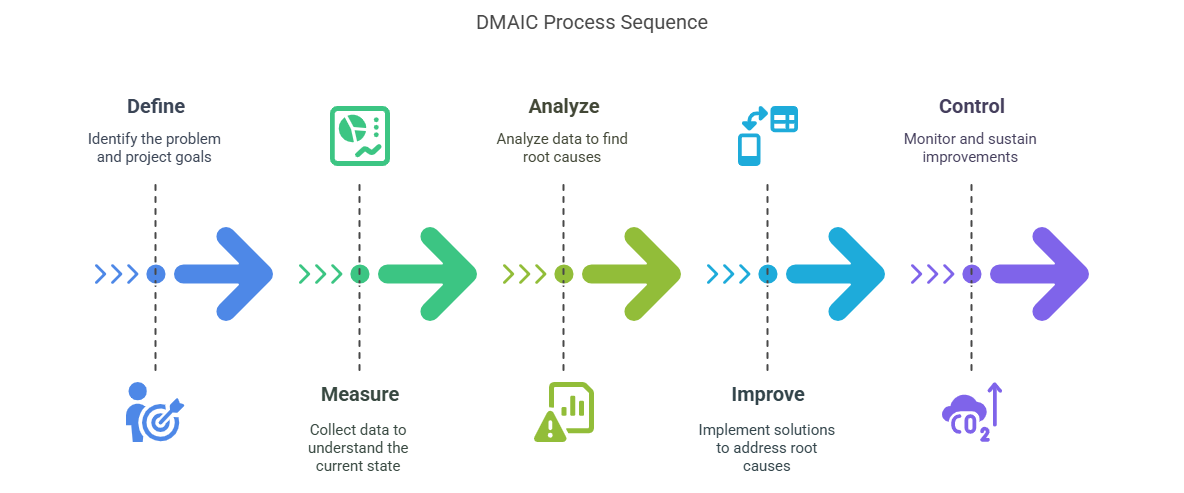

## 1. Define Phase

**Problem Statement**:  
Over 30% of deliveries take longer than expected, especially on weekends. This impacts customer satisfaction.

**Business Impact**:  
- Lower customer satisfaction  
- Reduced repeat orders  
- Negative ratings and reviews

**Goal**:  
Reduce the % of delayed deliveries from 30% to under 15%.

**Scope**:  
Focus only on delivery delays (not cooking delays or order placement issues).


## 2. Measure Phase

**Step 1: Load the Dataset**  

**Step 2: Data Overview**

In [25]:
import pandas as pd
df = pd.read_csv("C:/Users/dell/Downloads/food_order.csv")
df.head()
df.info()
df.describe()
plt.show()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


**Step 3: Clean the Data**

In [26]:
df["rating"] = df["rating"].replace("Not given", None)
df["rating"] = df["rating"].astype(float)
df["late_delivery"] = df["delivery_time"].apply(lambda x: "Yes" if x > 25 else "No")
plt.show()

## 3. Analyze Phase

### A. Distribution of Delivery Time

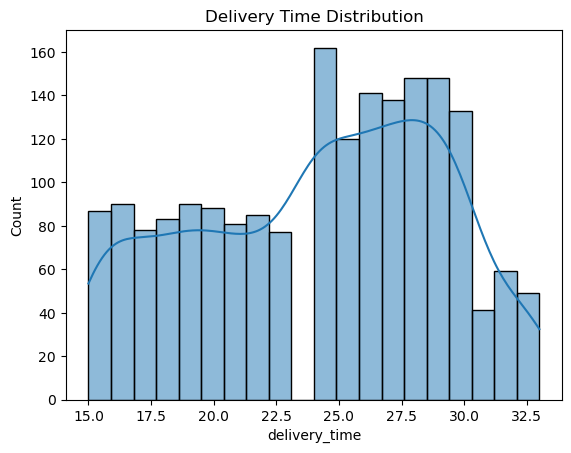

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.histplot(df["delivery_time"], bins=20, kde=True)
plt.title("Delivery Time Distribution")
plt.savefig("charts A.png") 
plt.show()

### B. Late Deliveries by Day of Week

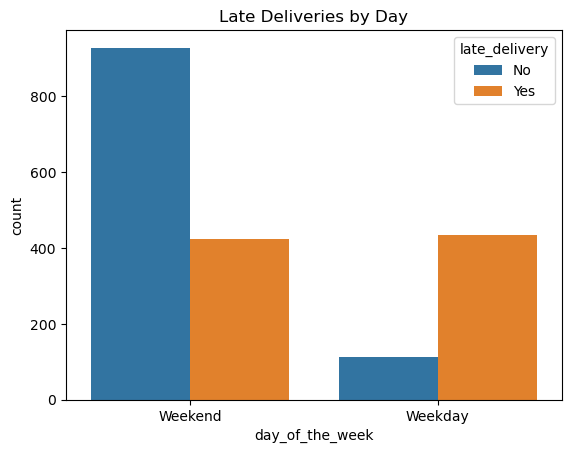

In [43]:
sns.countplot(x="day_of_the_week", hue="late_delivery", data=df)
plt.title("Late Deliveries by Day")
plt.savefig("charts B.png") 
plt.show()

## C. Late Deliveries by Cuisine Type

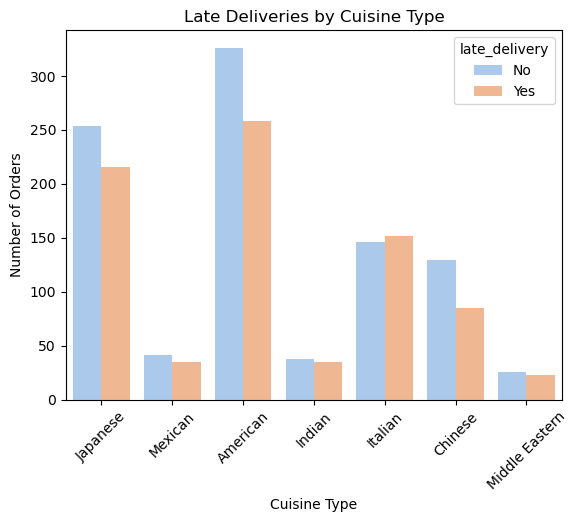

In [44]:
top_cuisines = df['cuisine_type'].value_counts().nlargest(7).index
subset = df[df['cuisine_type'].isin(top_cuisines)]

sns.countplot(x='cuisine_type', hue='late_delivery', data=subset, palette='pastel')
plt.title('Late Deliveries by Cuisine Type')
plt.xlabel('Cuisine Type')
plt.ylabel('Number of Orders')
plt.xticks(rotation=45)
plt.savefig("charts C.png") 
plt.show()

### D. Pareto Analysis (Top Reasons) 
Group by cuisine or restaurant to find high-delay contributors.

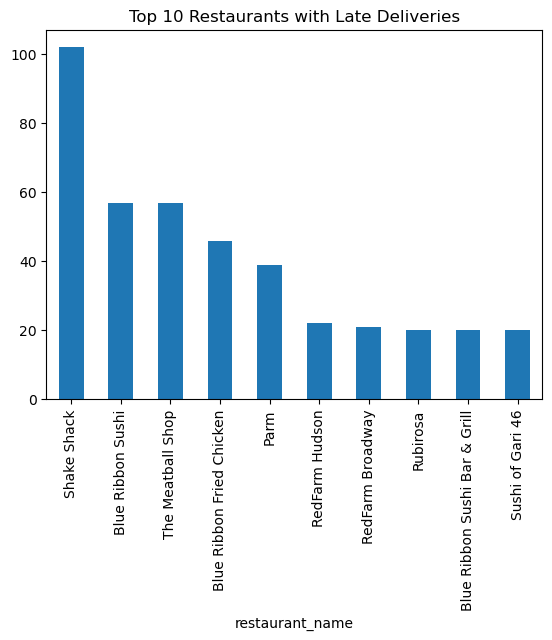

In [45]:
delay_counts = df[df["late_delivery"] == "Yes"]["restaurant_name"].value_counts().head(10)
delay_counts.plot(kind="bar")
plt.title("Top 10 Restaurants with Late Deliveries")
plt.savefig("charts D.png") 
plt.show()

## 4. Improve Phase

Based on our analysis, the following improvement ideas can help reduce late deliveries:

### Key Findings:
- Most delays happen on **weekends**, likely due to higher volume.
- Certain **cuisine types** and **specific restaurants** contribute more to delays.
- Deliveries taking more than **25 minutes** are considered late.

### Improvement Suggestions:

| Root Cause                 |   Improvement Action                                             |
|---------------------------|----------------------------------------------------------------|
| Weekend delivery spikes   |   Allocate extra delivery drivers during weekends               |
| Long food preparation time|   Set alerts for prep time >20 min and prioritize dispatch       |
| High-delay restaurants    |   Provide operational support or set SLAs for delay %           |
| Traffic congestion        |   Assign drivers based on real-time traffic zones               |
| Low-rated delivery agents |   Train or rotate underperforming staff                         |

### Potential Tools/Techniques:
- Delivery time prediction using ML (optional future scope)
- Driver-routing optimization based on past delays

## 5. Control Phase

After implementing improvements, we need a control mechanism to sustain the gains and monitor delivery performance over time.

### KPIs to Track:
- % of orders delivered within 25 minutes
- Average delivery time per day
- Number of late deliveries per restaurant

### Monitoring Tools:
- Weekly performance dashboard using Excel or Power BI
- Automated alerts for restaurants with >15% late delivery rate

### Control Plan Example:

| Parameter             | Target         | Frequency | Owner         | Action if Out of Control     |
|-----------------------|----------------|-----------|---------------|------------------------------|
| Avg Delivery Time     | < 25 mins      | Weekly    | Ops Manager   | Investigate delivery routes  |
| % Late Deliveries     | < 15%          | Weekly    | QA Team       | Alert assigned restaurant    |
| Customer Rating       | > 4.0 / 5      | Monthly   | Support Team  | Trigger CSAT survey          |


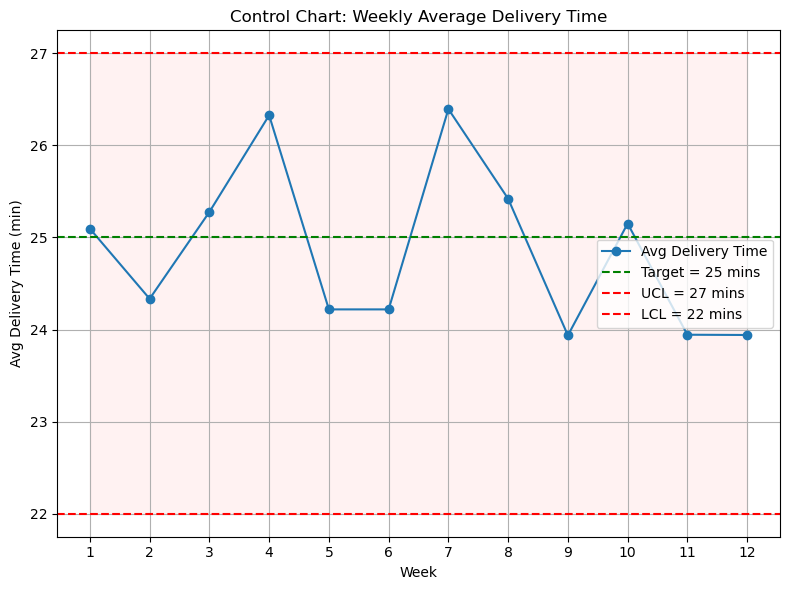

In [47]:
import numpy as np

# Simulate weekly average delivery time (in minutes)
weeks = list(range(1, 13))
np.random.seed(42)
avg_delivery_times = np.random.normal(loc= 24.5, scale= 1.2, size= 12)

# Define control limits
ucl = 27  # Upper Control Limit
lcl = 22  # Lower Control Limit
target = 25  # Target delivery time

# Create DataFrame
control_data = pd.DataFrame({
    "Week": weeks,
    "Average_Delivery_Time": avg_delivery_times
})

# Plot the control chart
plt.figure(figsize=(8, 6))
plt.plot(control_data["Week"], control_data["Average_Delivery_Time"], marker="o", label="Avg Delivery Time")
plt.axhline(y=target, color="green", linestyle="--", label="Target = 25 mins")
plt.axhline(y=ucl, color="red", linestyle="--", label="UCL = 27 mins")
plt.axhline(y=lcl, color="red", linestyle="--", label="LCL = 22 mins")
plt.fill_between(control_data["Week"], ucl, lcl, color="red", alpha=0.05)
plt.title("Control Chart: Weekly Average Delivery Time")
plt.xlabel("Week")
plt.ylabel("Avg Delivery Time (min)")
plt.xticks(weeks)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("charts E.png") 
plt.show()

### Future Scope

To further optimize food delivery operations beyond traditional analysis:

- **Delivery Time Prediction using Machine Learning**  
  Train a model (e.g., Random Forest or XGBoost) using historical data to predict if an order will be late based on order type, time, day, restaurant, etc.
- **Driver Routing Optimization**  
  Use delivery patterns to assign drivers more efficiently and avoid bottlenecks. This can reduce traffic delays and balance driver workloads.

These ideas can be explored as a future extension to this project for real-time operations.


## Conclusion

This project demonstrated the effective application of the DMAIC methodology (Define-Measure-Analyze-Improve-Control) using real-world food delivery data to reduce the occurrence of late orders. By examining key delivery time drivers such as day of the week, cuisine type, and specific restaurant performance, we identified critical bottlenecks impacting timeliness. Based on these insights, we proposed actionable improvements to streamline operations. The result is a structured, data-driven approach that enhances both delivery performance and overall customer experience. Future enhancements could incorporate advanced analytics, including predictive modeling and real-time routing optimization, to drive even greater efficiency.
